# **Exercício 11 - KDE**

Aluno: Giovanni Martins de Sá Júnior - 2017001850

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KernelDensity
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
# 1. Carregar a base de dados
np.random.seed(42)
theta = np.linspace(0, 4 * np.pi, 100)
r = 2 + theta / (4 * np.pi)
X = np.c_[r * np.cos(theta), r * np.sin(theta)]
y = np.ones(100)

In [ ]:
# 2. Separar os dados em treinamento e teste usando validação cruzada com 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
# 3. Treinar o modelo KDE definindo o melhor h inclusive
best_h = None
best_score = -np.inf

for h in np.linspace(0.1, 1.0, 10):
    kde = KernelDensity(bandwidth=h)
    scores = cross_val_score(kde, X, cv=kf)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_h = h

# Treinando o modelo KDE com o melhor h
kde = KernelDensity(bandwidth=best_h)
kde.fit(X)

KernelDensity(bandwidth=0.4)

In [ ]:
# 4. Plotar a superfície de densidade de probabilidade
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
zz = np.exp(kde.score_samples(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)

plt.contourf(xx, yy, zz, cmap='viridis', levels=20)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', s=20)
plt.title('Superfície de Densidade de Probabilidade')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

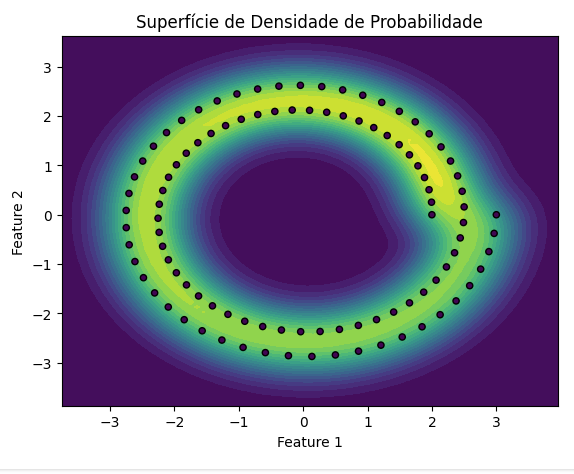

In [ ]:
# 5. Resolver o problema de classificação usando o classificador de Bayes
# A probabilidade de pertencer a uma classe é proporcional à densidade de probabilidade estimada pela KDE.
log_likelihood = kde.score_samples(X)
y_pred = np.argmax(log_likelihood, axis=0)

In [ ]:
# Certifique-se de que y_pred seja uma lista ou array de previsões
# Modifique o código para obter os índices da classe com maior densidade
y_pred = np.argmax(log_likelihood, axis=0)  # Use axis=0 para obter o índice da classe com maior densidade
y_pred = np.array([y_pred] * len(y))  # Replicar o índice para corresponder ao número de amostras

print(y_pred.shape)

(100,)


In [ ]:
# 6. Calcular a acurácia média e o desvio padrão
accuracy = accuracy_score(y, y_pred)
print(f'Acurácia: {accuracy:.2f}')

Acurácia: 0.00


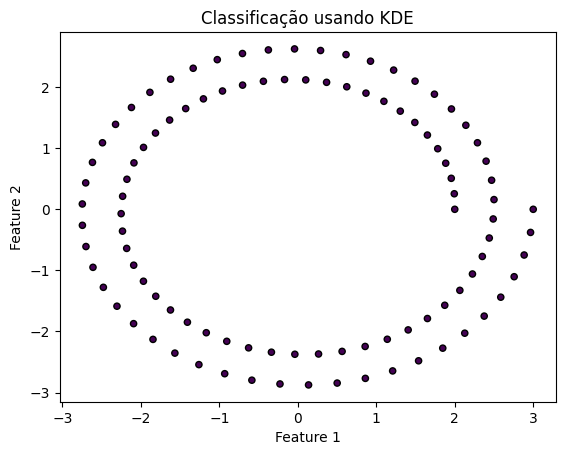

In [ ]:
# 7. Plotar os dados de teste no espaço das verossimilhanças
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', edgecolors='k', s=20)
plt.title('Classificação usando KDE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
